# Análise Estátistica de Dados

## Bibliotecas
Como este é um projeto de teste inicial no GitHub, o objetivo é fazer uma análise do conjunto de dados e das características, portanto, apenas as bibliotecas necessárias serão implementadas.

In [1]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Processamento básico de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Conjunto de dados
Este conjunto de dados contém informações sobre salários com base em experiência, idade, gênero, nível de educação e título do trabalho.

### Colunas:

1. **Age**: Idade do indivíduo.
2. **Gender**: Gênero do indivíduo.
3. **Education Level**: Nível de educação.
4. **Job Title**: Título do trabalho.
5. **Years of Experience**: Anos de experiência no campo.
6. **Salary**: Salário correspondente.

Para mais detalhes, você pode acessar o [conjunto de dados original](https://www.kaggle.com/datasets/mohithsairamreddy/salary-data).

In [3]:
# Lendo o arquivo CSV
df = pd.read_csv("Salary Data.csv")

# Imprimindo a forma do DataFrame
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

# Exibindo o DataFrame
df.head()


O dataset possui 6704 registros e 6 atributos.


Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0

In [4]:
#Vendo as colunas
df.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [5]:
#Obtendo as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
df['Education Level'].value_counts()

Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [7]:
df.replace("Master's","Master's Degree",inplace=True)
df.replace("Bachelor's","Bachelor's Degree",inplace=True)
df.replace('phD','PhD',inplace=True)
df['Education Level'].value_counts()

Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Name: Education Level, dtype: int64

In [8]:
#Verificando duplicatas
df.duplicated().sum()

4913

In [9]:
# Criando um DataFrame com as colunas de flag de duplicatas
df_duplicate = df.copy()
df_duplicate['flag_duplicated'] = df.duplicated()

# Contagem de duplicatas por linha
count_df = df_duplicate.groupby(list(df_duplicate.columns)).size().reset_index(name='count')

# Filtrando apenas as linhas com contagem maior que 1
filtered_count_df = count_df[count_df['count'] > 1]

# Ordenando as linhas pelo valor da contagem
sorted_count_df = filtered_count_df.sort_values(by='count', ascending=False).reset_index(drop=True)

sorted_count_df.head(15)

Age  Gender    Education Level          Job Title  Years of Experience  \
0   24.0  Female        High School       Receptionist                  0.0   
1   27.0    Male  Bachelor's Degree  Software Engineer                  3.0   
2   32.0    Male  Bachelor's Degree    Product Manager                  7.0   
3   32.0    Male  Bachelor's Degree  Software Engineer                  8.0   
4   33.0  Female    Master's Degree    Product Manager                 11.0   
5   29.0  Female    Master's Degree     Data Scientist                  6.0   
6   27.0    Male  Bachelor's Degree  Software Engineer                  4.0   
7   25.0    Male  Bachelor's Degree    Product Manager                  1.0   
8   26.0    Male  Bachelor's Degree       Data Analyst                  3.0   
9   31.0  Female                PhD     Data Scientist                  8.0   
10  29.0    Male  Bachelor's Degree  Marketing Analyst                  4.0   
11  30.0  Female                PhD     Data Scientist                  7.0   
12  24.0    Male  Bachelor's Degree       Data Analyst                  1.0   
13  28.0  Female  Bachelor's Degree  Software Engineer                  5.0   
14  31.0    Male  Bachelor's Degree       Data Analyst                  9.0   

      Salary  flag_duplicated  count  
0    25000.0             True     44  
1    80000.0             True     44  
2   120000.0             True     44  
3   190000.0             True     38  
4   198000.0             True     37  
5   180000.0             True     36  
6   140000.0             True     36  
7    60000.0             True     35  
8   130000.0             True     34  
9   140000.0             True     32  
10   70000.0             True     32  
11  185000.0             True     32  
12   90000.0             True     31  
13  160000.0             True     30  
14  195000.0             True     29

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(1791, 6)

In [11]:
#Verificando se a nulos
df.isnull().sum()

Age                    1
Gender                 1
Education Level        2
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64

In [12]:
round((df.isnull().sum()/df.shape[0])*100,3)

Age                    0.056
Gender                 0.056
Education Level        0.112
Job Title              0.056
Years of Experience    0.112
Salary                 0.223
dtype: float64

In [13]:
df[df["Salary"].isna()]

Age  Gender    Education Level            Job Title  \
172    NaN     NaN                NaN                  NaN   
3136  31.0    Male    Master's Degree  Full Stack Engineer   
5247  26.0  Female  Bachelor's Degree             Social M   
6455  36.0    Male  Bachelor's Degree       Sales Director   

      Years of Experience  Salary  
172                   NaN     NaN  
3136                  8.0     NaN  
5247                  NaN     NaN  
6455                  6.0     NaN

In [14]:
# Como há poucos nulos, é possível usar o método de eliminação de linhas 
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1786 non-null   float64
 1   Gender               1786 non-null   object 
 2   Education Level      1786 non-null   object 
 3   Job Title            1786 non-null   object 
 4   Years of Experience  1786 non-null   float64
 5   Salary               1786 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.7+ KB


In [15]:
# Imprimindo a forma do DataFrame
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

O dataset possui 1786 registros e 6 atributos.


In [16]:
#Extraindo estatiticas
df.describe().T

count           mean           std    min      25%  \
Age                  1786.0      35.142217      8.214760   21.0     29.0   
Years of Experience  1786.0       9.159015      6.845753    0.0      3.0   
Salary               1786.0  113220.037514  51589.303161  350.0  70000.0   

                          50%       75%       max  
Age                      33.0      41.0      62.0  
Years of Experience       8.0      13.0      34.0  
Salary               110000.0  160000.0  250000.0

In [17]:
df.nunique()

Age                     41
Gender                   3
Education Level          4
Job Title              191
Years of Experience     37
Salary                 444
dtype: int64

In [18]:
# Selecionando apenas as colunas numérica
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Percorrendo cada coluna numérica do DataFrame
for col in numeric_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts().iloc[:5])
    print('\n')


Coluna: Age
29.0    106
27.0    104
28.0    104
33.0    104
31.0    101
Name: Age, dtype: int64


Coluna: Years of Experience
2.0    151
3.0    142
1.0    126
4.0    123
8.0    105
Name: Years of Experience, dtype: int64


Coluna: Salary
120000.0    76
40000.0     59
140000.0    56
180000.0    55
55000.0     55
Name: Salary, dtype: int64




In [19]:
#Transformando os numerais em inteiros
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col] = df[col].astype(int)

#Verificando se a conversão foi realizada
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1786 non-null   int32 
 1   Gender               1786 non-null   object
 2   Education Level      1786 non-null   object
 3   Job Title            1786 non-null   object
 4   Years of Experience  1786 non-null   int32 
 5   Salary               1786 non-null   int32 
dtypes: int32(3), object(3)
memory usage: 76.7+ KB


In [20]:
# Selecionando apenas as colunas textuais
text_columns = df.select_dtypes(include=[np.object]).columns

# Percorrendo cada coluna textual do DataFrame
for col in text_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts().iloc[:5])
    print('\n')

    

Coluna: Gender
Male      966
Female    813
Other       7
Name: Gender, dtype: int64


Coluna: Education Level
Bachelor's Degree    767
Master's Degree      568
PhD                  341
High School          110
Name: Education Level, dtype: int64


Coluna: Job Title
Software Engineer Manager    127
Full Stack Engineer          122
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
Name: Job Title, dtype: int64




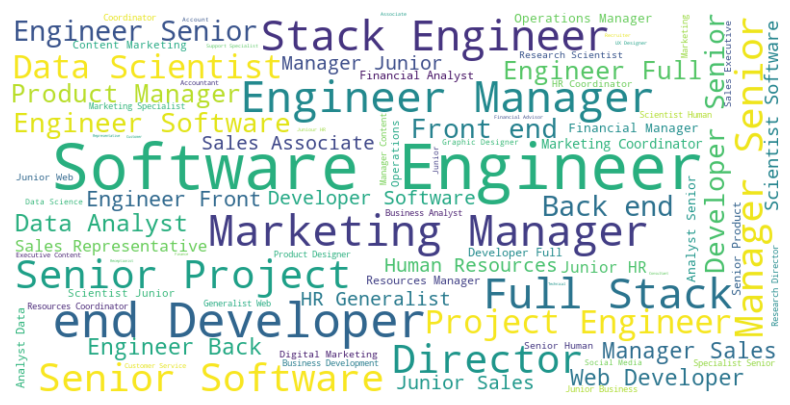

In [21]:

# Combine todo o texto da coluna 'text_column'
all_text = ' '.join(df['Job Title'])

# Crie um objeto WordCloud com alinhamento horizontal
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(all_text)

# Exiba a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
# a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.
df_describe = df.describe()

# A amplitude é a diferença entre o valor máximo e mínimo. 
df_describe.loc['amp'] = df_describe.loc['max'] - df_describe.loc['min'] 

# O coeficiente de variação (CV) é uma medida da variabilidade relativa em relação à média.
df_describe.loc['cv'] = (df_describe.loc['std'] / df_describe.loc['mean'] ).abs() *100

# A assimetria é uma medida estatística para avaliar a assimetria na distribuição dos dados.
df_describe.loc['skewness'] = df.skew()

# Calculando o IQR para cada coluna numérica
df_describe.loc['IQR'] = df_describe.loc['75%'] - df_describe.loc['25%']

# Por fim, o código arredonda os valores para duas casas decimais e transpõe o DataFrame para melhor visualização.
df_describe.round(2).T

count       mean       std    min      25%       50%  \
Age                  1786.0      35.14      8.21   21.0     29.0      33.0   
Years of Experience  1786.0       9.16      6.85    0.0      3.0       8.0   
Salary               1786.0  113220.04  51589.30  350.0  70000.0  110000.0   

                          75%       max       amp     cv  skewness      IQR  
Age                      41.0      62.0      41.0  23.38      0.67     12.0  
Years of Experience      13.0      34.0      34.0  74.81      0.90     10.0  
Salary               160000.0  250000.0  249650.0  45.57      0.08  90000.0

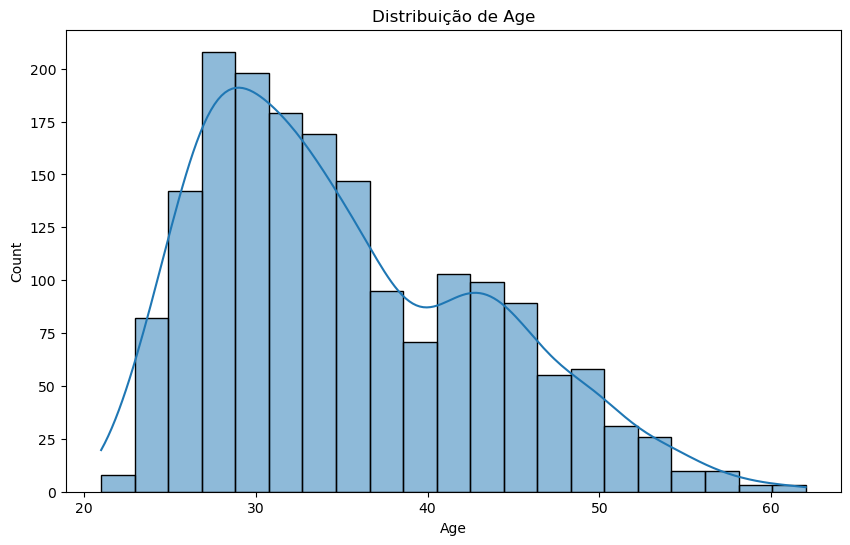

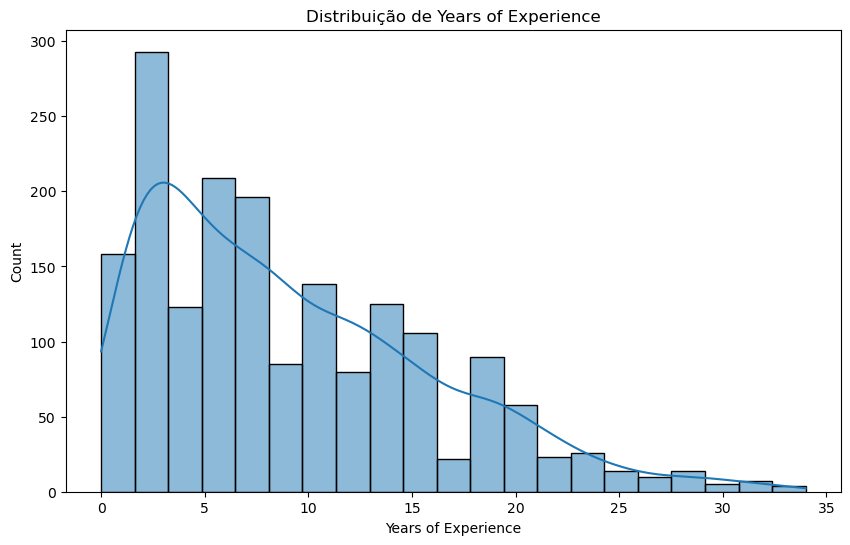

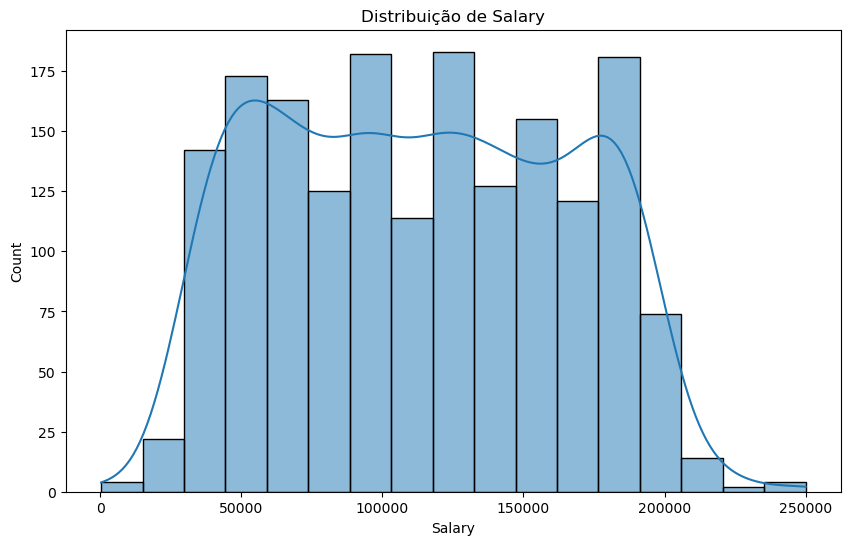

In [23]:
# Selecionando apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    # Criando o gráfico de densidade de kernel
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()


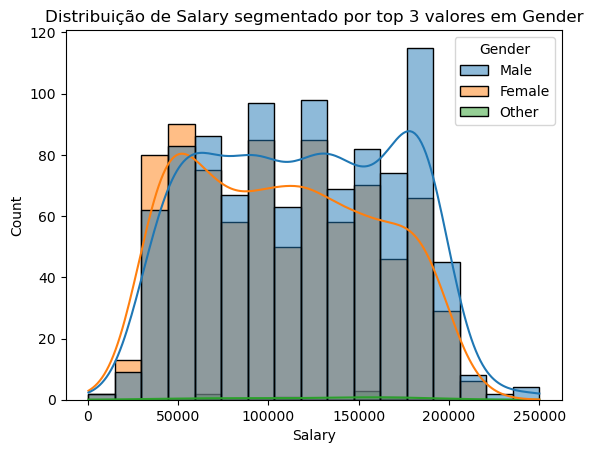

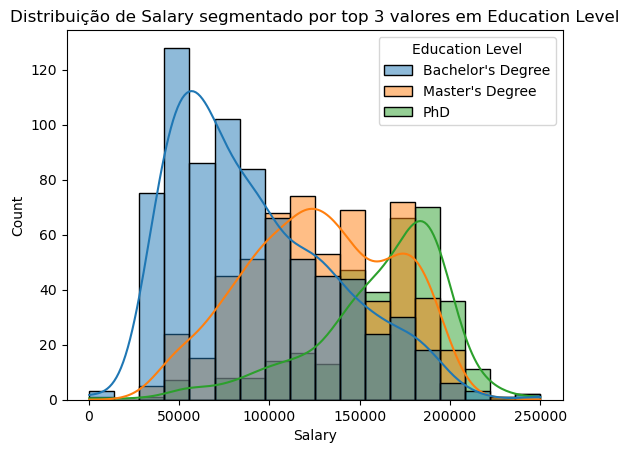

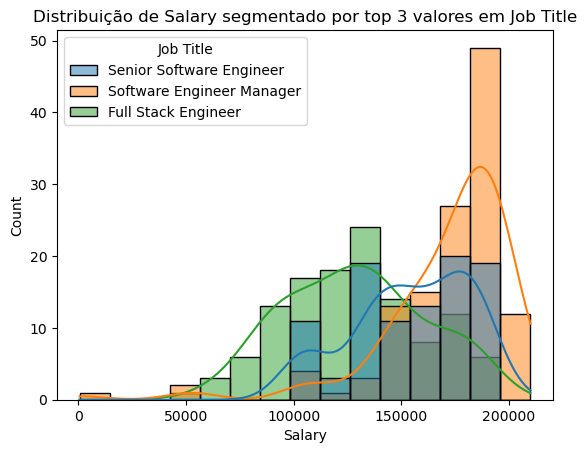

In [24]:
for col in text_columns:
    # Selecionando os top 3 valores
    top_3_values = df[col].value_counts().index[:3]

    # Filtrando o DataFrame original para incluir apenas as linhas que correspondem aos 3 principais valores
    df_top_3 = df[df[col].isin(top_3_values)]

    # Criando o gráfico de densidade de kernel
    sns.histplot(data=df_top_3, x="Salary", hue=col, kde=True)
    plt.title(f'Distribuição de Salary segmentado por top 3 valores em {col}')
    plt.show()




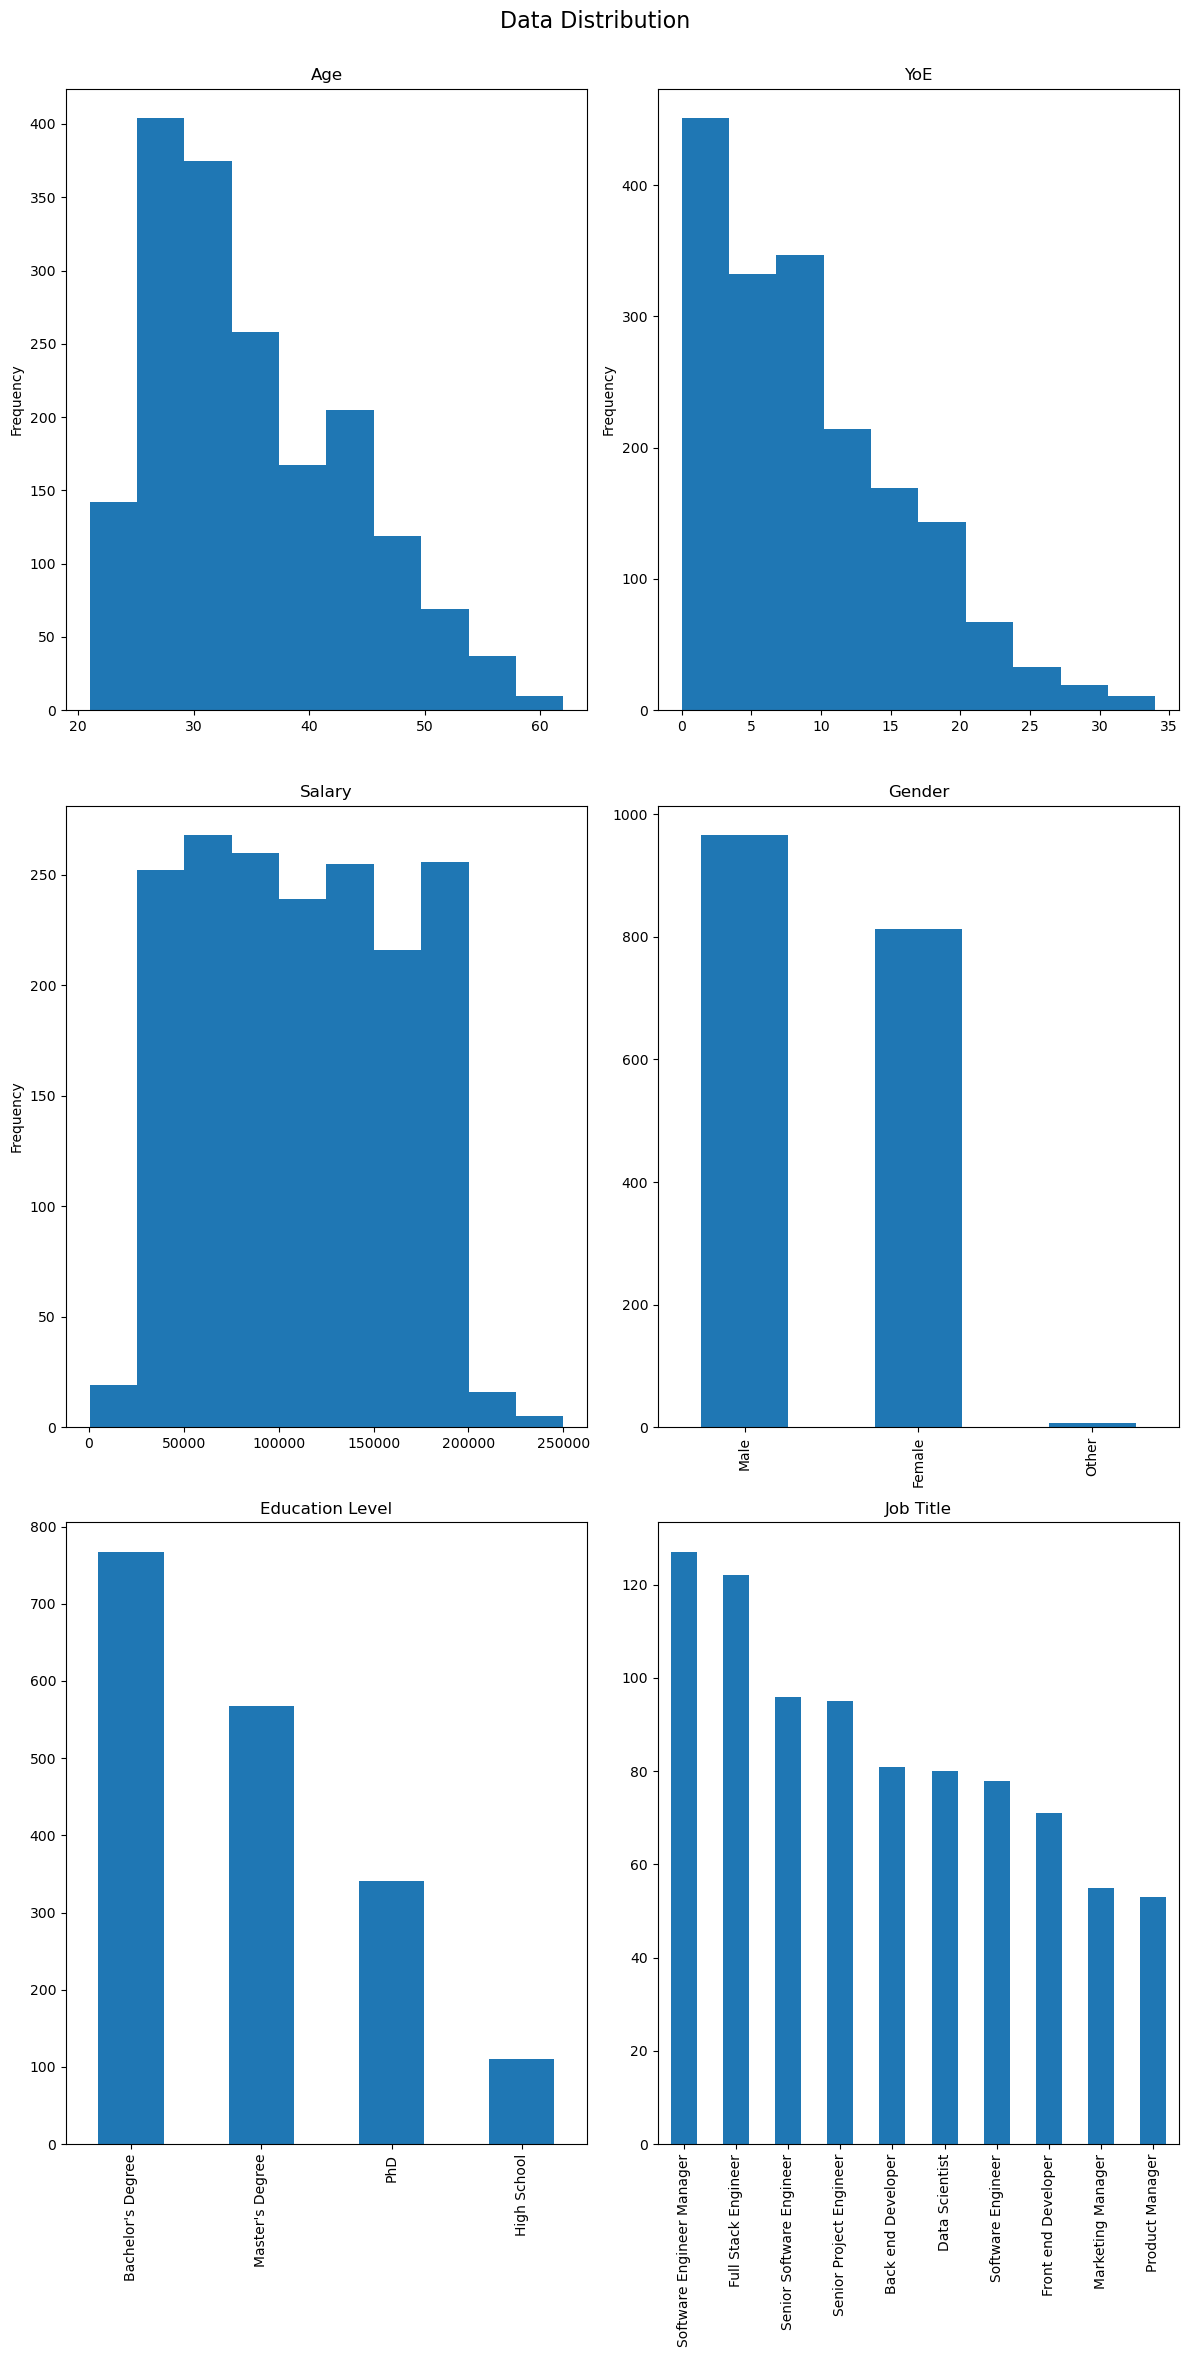

In [25]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(12,24))

df['Age'].plot(kind='hist', ax=axes[0,0], title='Age')
df['Years of Experience'].plot(kind='hist', ax=axes[0,1], title='YoE')
df['Salary'].plot(kind='hist', ax=axes[1,0], title='Salary')
df['Gender'].value_counts().plot(kind='bar', ax=axes[1,1], title='Gender')
df['Education Level'].value_counts().plot(kind='bar', ax=axes[2,0], title='Education Level')
df['Job Title'].value_counts()[:10].plot(kind='bar', ax=axes[2,1], title='Job Title')

fig.suptitle('Data Distribution\n\n', fontsize=16)
plt.tight_layout()

In [26]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('<b>Gender','<b>Education Level','<b>Age', '<b>Years of Experience'))

fig.add_trace(go.Box(x=df['Gender'], y=df['Salary']), row=1, col=1).update_yaxes(title_text='<b>Salary'),
fig.add_trace(go.Box(x=df['Education Level'], y=df['Salary']), row=1, col=2)
fig.add_trace(go.Box(x=df['Age'], y=df['Salary']), row=2, col=1)
fig.add_trace(go.Box(x=df['Years of Experience'], y=df['Salary']), row=2, col=2)

fig.update_layout(title='<b>Data Distribution respect Salary', height=800, width=800,
                 showlegend=False,
                 title_font_size = 20)
fig.show()

In [27]:
fig = px.histogram(df, x='Age', title='Histograma de Edades')

fig.update_traces(marker_color='blue', 
                  opacity=0.7, 
                  marker_line_color='black', 
                  marker_line_width=1
                 )

fig.update_xaxes(title_text='Age') 
fig.update_yaxes(title_text='Frequency') 

fig.update_layout(
             yaxis_title = '<b>Frequency',
             xaxis_title = '<b>Age',
             title='<b>Age Frequency',
             title_font_size = 20,
                          )

fig.show()

In [28]:
fig = px.histogram(df, x='Years of Experience', 
                   title='Histograma de Edades', 
                   
  )

fig.update_traces(marker_color='blue', 
                  opacity=0.7, 
                  marker_line_color='black', 
                  marker_line_width=1
                 )

fig.update_xaxes(title_text='Age') 
fig.update_yaxes(title_text='Frequency') 

fig.update_layout(
             yaxis_title = '<b>Frequency',
             xaxis_title = '<b>Years of Experience',
             title='<b>Years of Experience Frequency',
             title_font_size = 20,
    
             )


fig.show()

In [29]:
fig = px.histogram(df, x='Salary')

fig.update_traces(marker_color='blue', 
                  opacity=0.7, 
                  marker_line_color='black', 
                  marker_line_width=1
                 )

fig.update_xaxes(title_text='Salary') 
fig.update_yaxes(title_text='Frequency') 

fig.update_layout(
             yaxis_title = '<b>Frequency',
             xaxis_title = '<b>Years of Experience',
             title='<b>Salary Frequency',
             title_font_size = 20,
    
             )


fig.show()

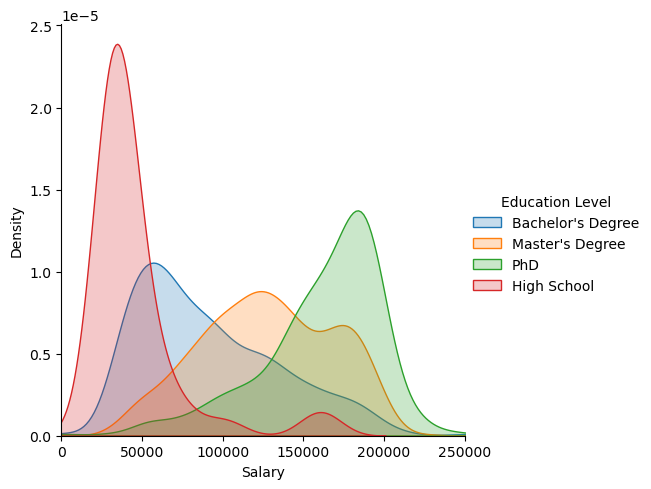

In [30]:
(sns.FacetGrid(df, hue="Education Level", height=5, xlim=(0, 250000))
.map(sns.kdeplot, "Salary", fill=True)
.add_legend()
);

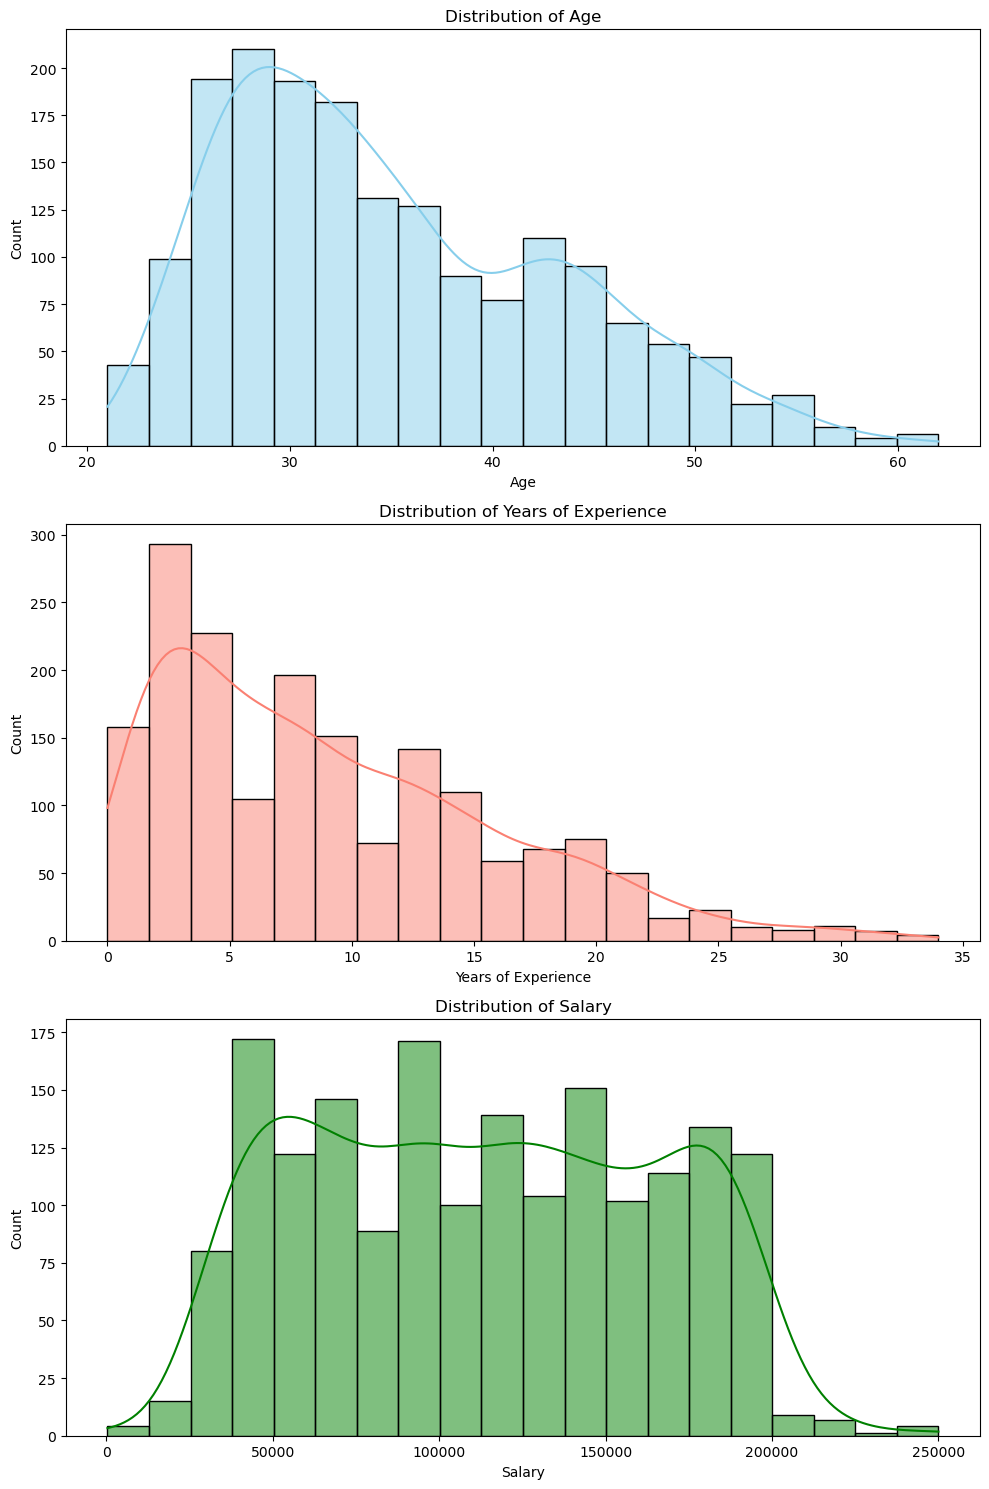

In [31]:
# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot histograms for Age, Years of Experience, and Salary
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age')

sns.histplot(df['Years of Experience'], bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Years of Experience')

sns.histplot(df['Salary'], bins=20, kde=True, ax=axes[2], color='green')
axes[2].set_title('Distribution of Salary')

# Adjust layout
plt.tight_layout()
plt.show()

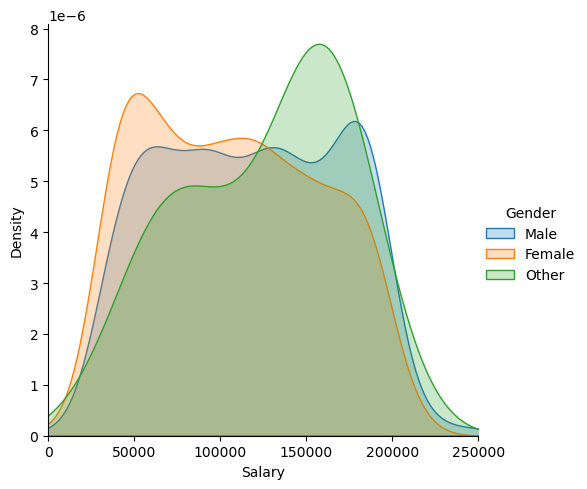

In [32]:
(sns.FacetGrid(df, hue="Gender", height=5, xlim=(0, 250000))
.map(sns.kdeplot, "Salary", fill=True)
.add_legend()
);

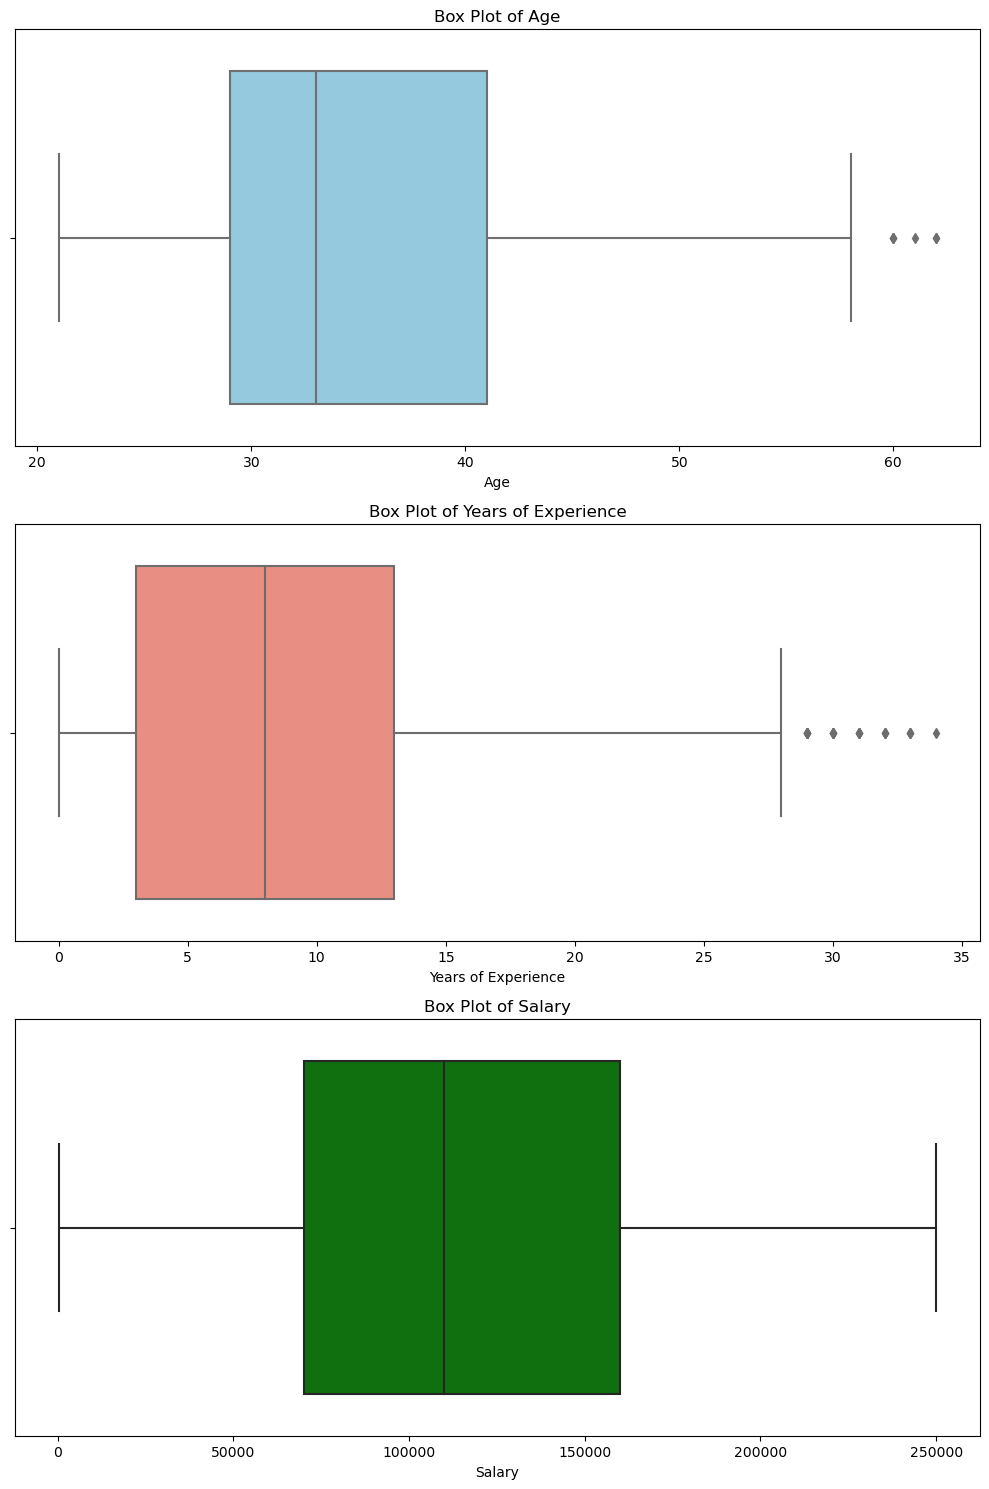

In [33]:
# Box plots for Age, Years of Experience, and Salary
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

sns.boxplot(x=df['Age'], ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot of Age')

sns.boxplot(x=df['Years of Experience'], ax=axes[1], color='salmon')
axes[1].set_title('Box Plot of Years of Experience')

sns.boxplot(x=df['Salary'], ax=axes[2], color='green')
axes[2].set_title('Box Plot of Salary')

# Adjust layout
plt.tight_layout()
plt.show()

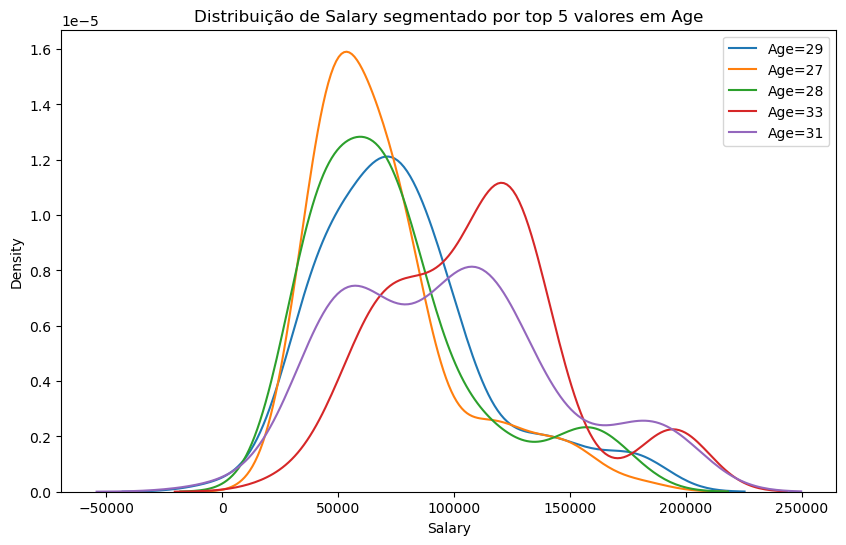

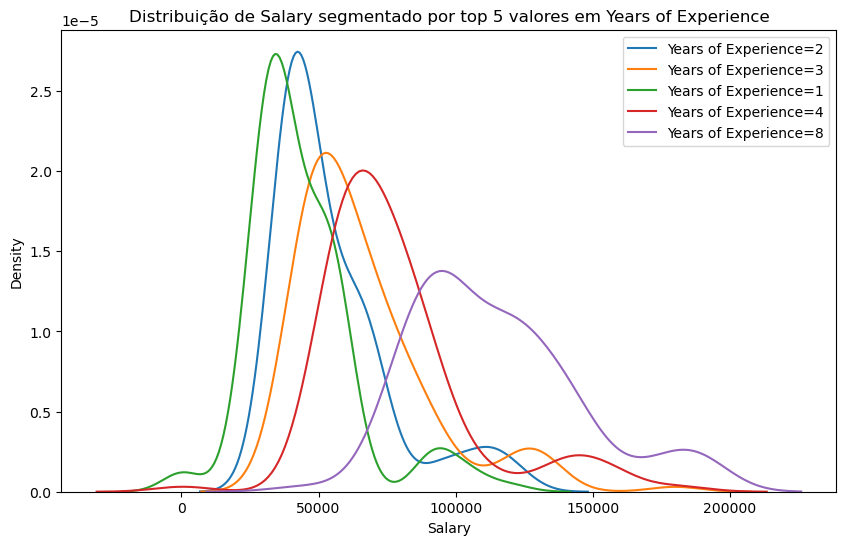

In [34]:
# Selecionando apenas as colunas numéricas, excluindo a coluna 'Salary'
numeric_columns_salary = df.select_dtypes(include=[np.number]).columns.drop('Salary')

for col in numeric_columns_salary:
    # Selecionando os top 5 valores
    top_5_values = df[col].value_counts().index[:5]

    # Criando um novo DataFrame com apenas os top 5 valores
    df_top_5 = df[df[col].isin(top_5_values)]

    # Criando o gráfico de densidade de kernel
    plt.figure(figsize=(10, 6))
    for value in top_5_values:
        sns.kdeplot(data=df_top_5[df_top_5[col] == value], x='Salary', label=f'{col}={value}')
    plt.title(f'Distribuição de Salary segmentado por top 5 valores em {col}')
    plt.legend()
    plt.show()



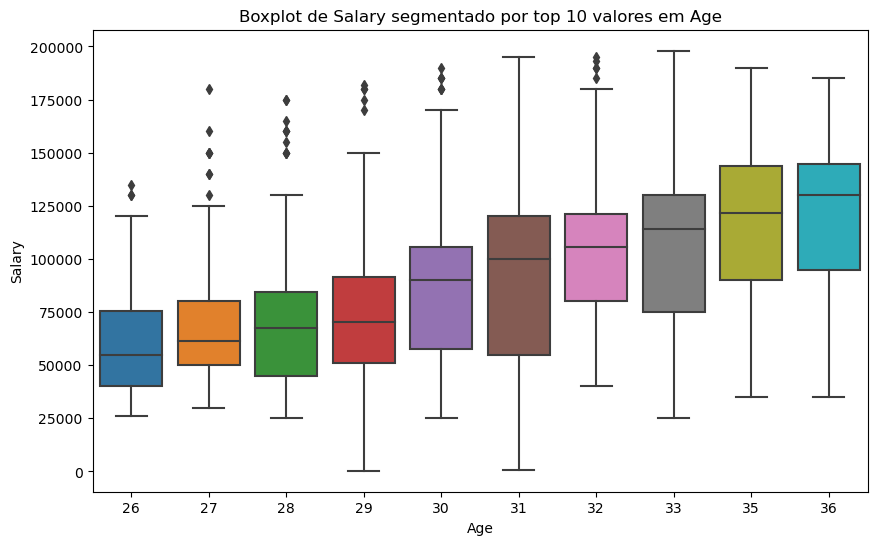

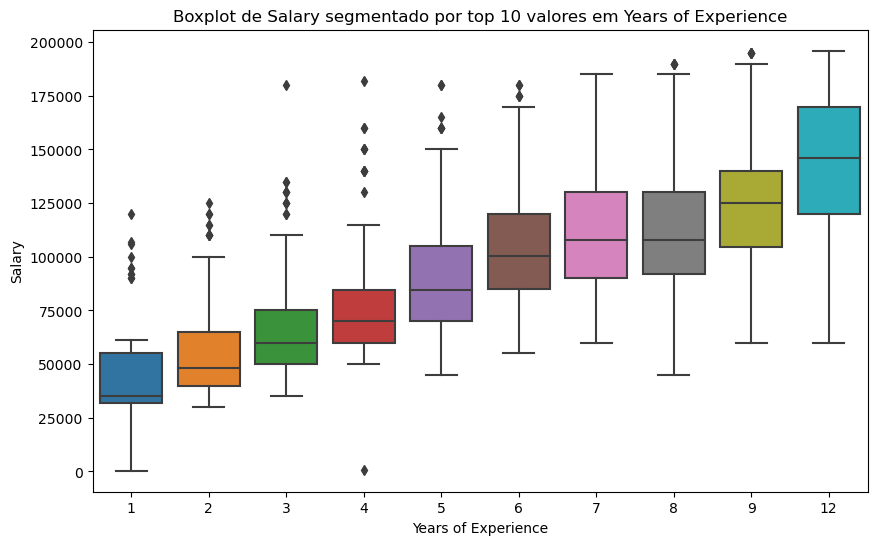

In [35]:
for col in numeric_columns_salary:
    # Selecionando os top 5 valores
    top_10_values = df[col].value_counts().index[:10]

    # Criando um novo DataFrame com apenas os top 5 valores
    df_top_10 = df[df[col].isin(top_10_values)]

    # Criando o boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Salary', data=df_top_10)
    plt.title(f'Boxplot de Salary segmentado por top 10 valores em {col}')
    plt.show()



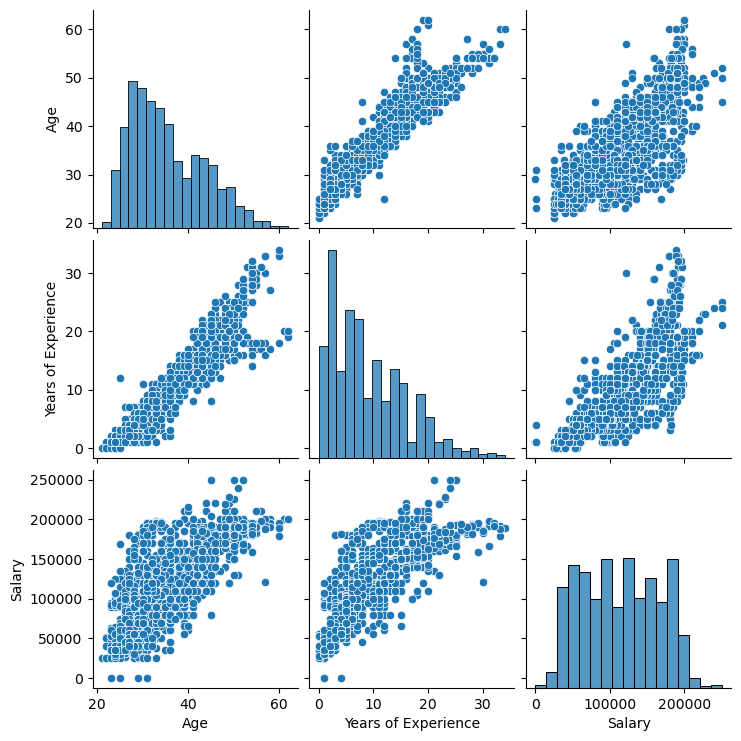

In [36]:
sns.pairplot(df);

In [37]:
for col in numeric_columns_salary:
    fig = px.box(df, y=col)
    fig.update_layout(title_text=f'Boxplot de {col}')
    fig.show()

In [41]:
df[['Age', 'Years of Experience','Salary']].corr()

Age  Years of Experience    Salary
Age                  1.000000             0.936193  0.766872
Years of Experience  0.936193             1.000000  0.818945
Salary               0.766872             0.818945  1.000000

<AxesSubplot:>

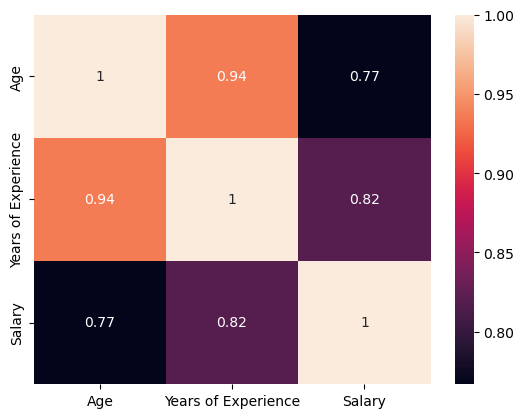

In [38]:
sns.heatmap(df.corr(), annot=True)

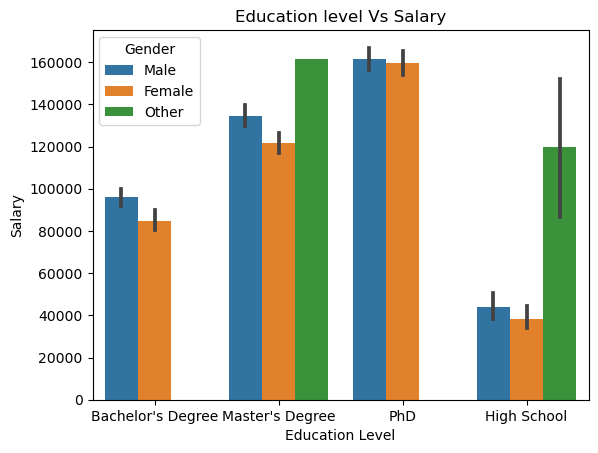

In [40]:
sns.barplot(x='Education Level',y='Salary', data=df , hue='Gender')
plt.title('Education level Vs Salary');

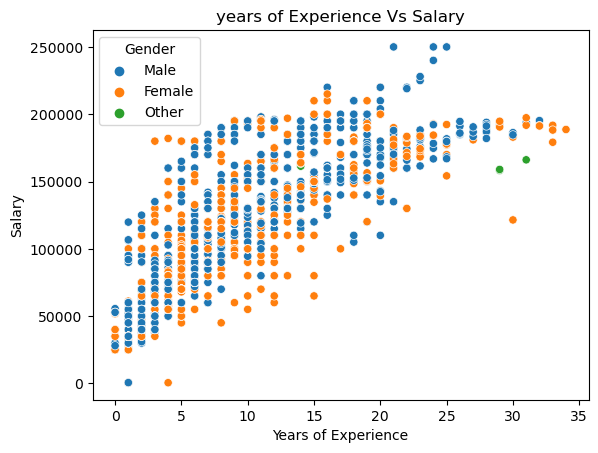

In [39]:
sns.scatterplot(x='Years of Experience',y='Salary', data=df , hue='Gender')
plt.title ("years of Experience Vs Salary");

In [42]:
max_salary=df.groupby('Job Title')[['Salary']].max().reset_index() \
.sort_values('Salary',ascending=False) \
.head(10)

min_salary=df.groupby('Job Title')[['Salary']].min().reset_index() \
.sort_values('Salary') \
.head(10)

In [43]:
min_salary

Job Title  Salary
60   Junior Business Operations Analyst     350
69                Junior HR Coordinator     500
43                  Front end Developer     550
176           Software Engineer Manager     579
83          Junior Sales Representative   25000
82               Junior Sales Associate   25000
115                     Sales Associate   25000
111                        Receptionist   25000
21                      Delivery Driver   28000
120                Sales Representative   30000

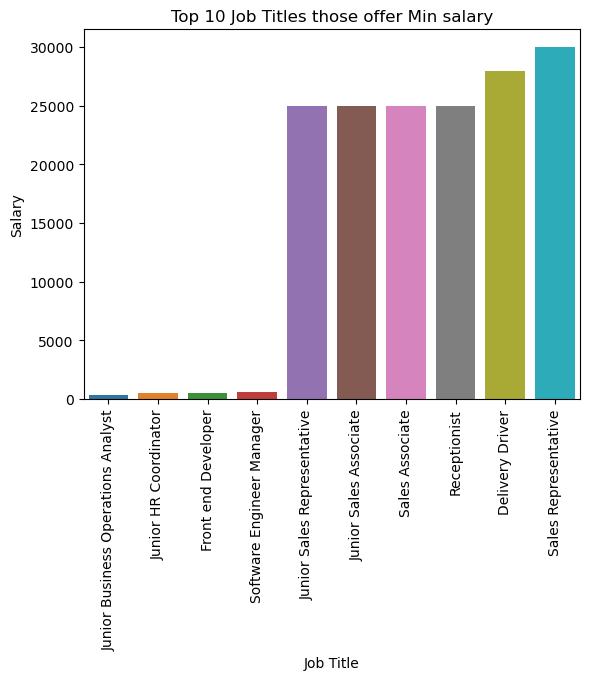

In [45]:
sns.barplot(x ='Job Title', y='Salary', data=min_salary)
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles those offer Min salary')
plt.show()

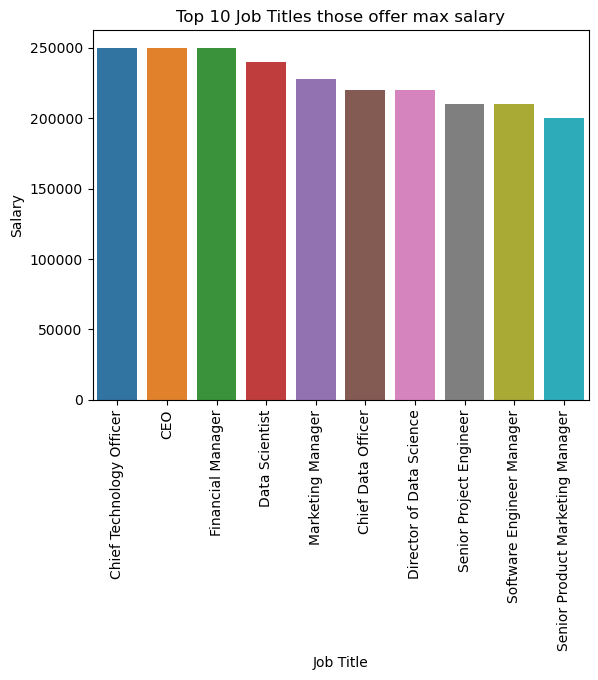

In [44]:
sns.barplot(x ='Job Title', y='Salary', data=max_salary )
plt.xticks(rotation=90)
plt.title('Top 10 Job Titles those offer max salary')
plt.show()

<AxesSubplot:xlabel='Years of Experience', ylabel='Salary'>

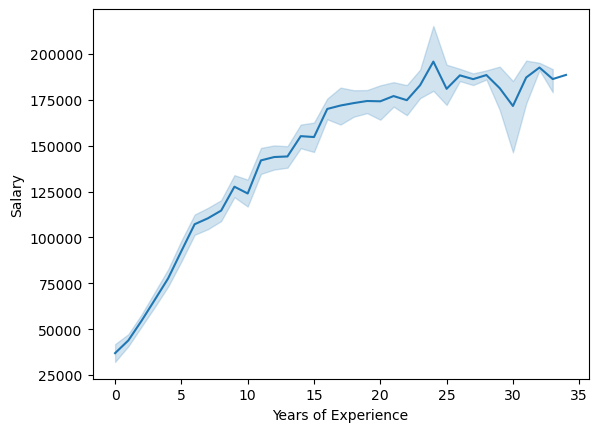

In [50]:
sns.lineplot(data = df,x = "Years of Experience",y = "Salary")

In [47]:
gender_S_mean= df.groupby('Gender')[['Salary']].mean()
gender_E_mean = df.groupby('Gender')[['Years of Experience']].mean()
gender_E_S = pd.concat ([gender_S_mean,gender_E_mean],axis=1)
gender_E_S.columns=['Mean Salary', 'Mean years of Exp']


print(gender_E_S)

          Mean Salary  Mean years of Exp
Gender                                  
Female  107365.271833           8.665437
Male    118056.198758           9.515528
Other   125819.000000          16.428571
